# Stock Market Analysis

In [19]:
#import necessary library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Loading

In [20]:
#importing dataset
data = pd.read_csv("Data]/ASIANPAINT.csv")
data

3

3

## Data Cleaning & Transformation

In [21]:
data['Trades'] = data['Trades'].mask(data['Volume'] >= 2000, data['Trades'].fillna(20000))

In [22]:
data['Deliverable Volume'] = data['Deliverable Volume'].mask(data['Trades'] >= 20000, data['Deliverable Volume'].fillna(np.random.randint(10000, 30000)))

In [26]:
data['Deliverble'] = data['Deliverble'].fillna(np.random.randint(20000, 200000))


In [28]:
# Correct column names and modify the 'Deliverable' column
data['Deliverble'] = data['Deliverble'].mask(data['Deliverable Volume'] >= 30000, 
                                             np.random.randint(20000, 200000))


In [29]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.00,370.00,385.0,381.65,380.54,3318,1.262617e+11,20000.0,16454.0,157049.0
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.00,375.00,390.0,385.55,383.50,4818,1.847699e+11,20000.0,16454.0,157049.0
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.00,371.50,383.0,383.00,379.81,2628,9.981384e+10,20000.0,16454.0,157049.0
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.90,374.50,375.1,377.50,379.88,3354,1.274114e+11,20000.0,16454.0,157049.0
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.00,370.00,389.0,385.70,383.38,9589,3.676275e+11,20000.0,16454.0,157049.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,154750.0
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,154750.0
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,154750.0
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,154750.0


# Visualization

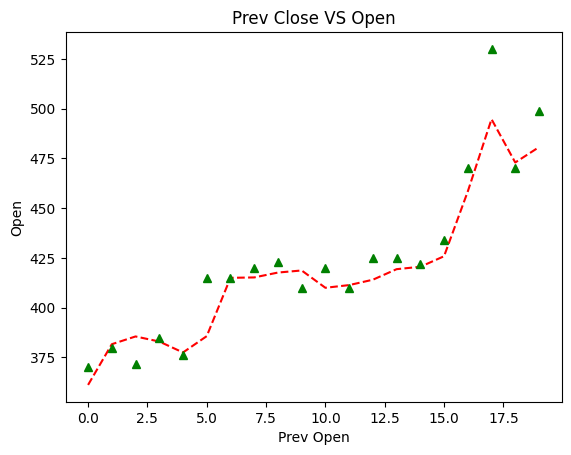

In [40]:
x = data['Prev Close'][:20]
y = data['Open'][:20]
plt.plot(x, 'r--', y, 'g^')
plt.title("Prev Close VS Open")
plt.xlabel("Prev Open")
plt.ylabel("Open")
plt.show()

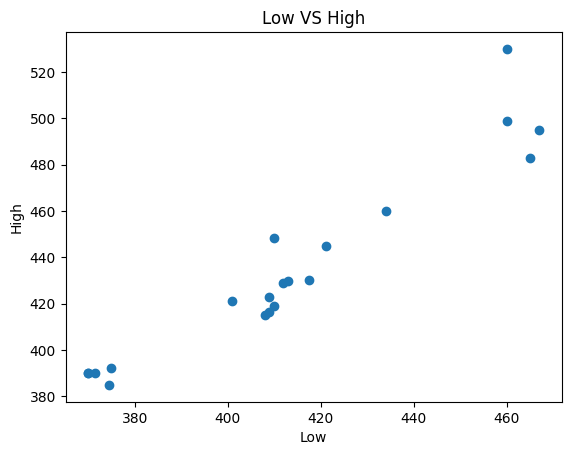

In [39]:
x = data['Low'][:20]
y = data['High'][:20]
plt.scatter(x ,y)
plt.title("Low VS High")
plt.xlabel("Low")
plt.ylabel("High")
plt.show()

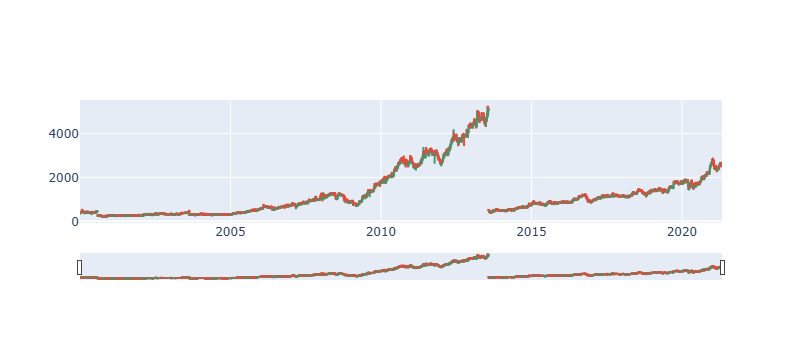

In [42]:
import plotly.graph_objects as go

# from datatime import datetime

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high= data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.show()

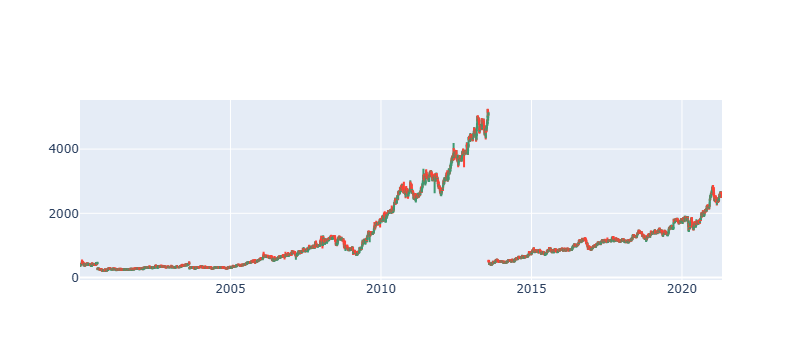

In [43]:
import plotly.graph_objects as go

# from datatime import datetime

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high= data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# Categorical Variables

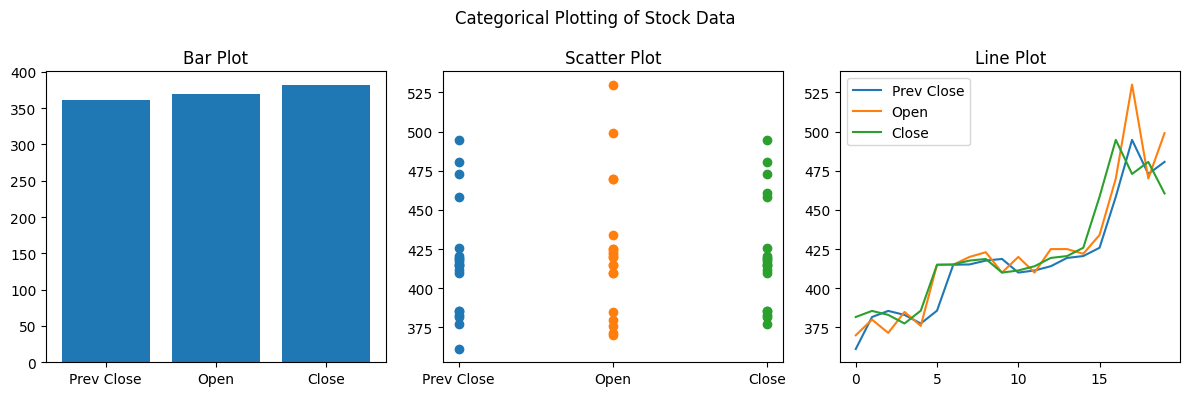

In [45]:
names = ['Prev Close', 'Open', 'Close']
values = [data['Prev Close'][:20], data['Open'][:20], data['Close'][:20]]

plt.figure(figsize=(12, 4))

# Bar Plot for the first stock data point
plt.subplot(131)
plt.bar(names, [data['Prev Close'][0], data['Open'][0], data['Close'][0]])
plt.title('Bar Plot')

# Scatter Plot for the first 20 stock data points
plt.subplot(132)
for i, name in enumerate(names):
    plt.scatter([name] * 20, values[i], label=name)
plt.title('Scatter Plot')

# Line Plot for the first 20 stock data points
plt.subplot(133)
for i, name in enumerate(names):
    plt.plot(values[i], label=name)
plt.title('Line Plot')

plt.suptitle('Categorical Plotting of Stock Data')
plt.legend()
plt.tight_layout()
plt.show()